## 作業

1. 如何使用已經訓練好的模型？
2. 依照 https://github.com/qqwweee/keras-yolo3 的程式碼，請敘述，訓練模型時，資料集的格式是什麼？具體一點的說，要提供什麼格式的文件來描述資料集的圖片以及 bboxes 的信息呢？





In [1]:
%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


In [2]:
pip install keras==2.2.4 # 需要安裝 keras 2.2.4 的版本

     |████████████████████████████████| 317kB 4.3MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [5]:
from google.colab import drive 
drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
import os
%cd 'gdrive/My Drive'
# !git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
# 此處為google drive中的文件路徑，drive為之前指定的工作跟目錄，要加上位置
# 如果存放的路徑有變，從/content/drive/My Drive/XXXXX...做調整
path = "/content/gdrive/My Drive/深度學習與電腦視覺學習馬拉松-第二屆/Day_41/keras-yolo3-master"
os.chdir(path)  #os.chdir():改變當前工作目錄到指定的路徑。
# %cd keras-yolo3
!ls 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive'
/content/gdrive/My Drive
2007_train.txt			 README.md
2007_val.txt			 train_bottleneck.py
coco_annotation.py		 trained_weights_stage_1.png
convert.py			 train.py
darknet53.cfg			 voc_annotation.py
Day41_train_yolov3_HW.ipynb	 VOCdevkit
Day41_train_yolov3_Sample.ipynb  VOCtrainval_06-Nov-2007.tar
dog.jpg				 yolo3
font				 yolo.py
kmeans.py			 yolov3.cfg
LICENSE				 yolov3-tiny.cfg
logs				 yolov3.weights
model_data			 yolo_video.py
__pycache__


In [0]:
#載入套件
from PIL import Image
#讀取圖片
image = Image.open('dog.jpg') 

# 1.如何使用已經訓練好的模型？

在 yolo.py中指定 include create YOLO 的 class，然後提供訓練好的模型檔案以及描述類別的文件

In [7]:
from yolo import YOLO
yolo_model = YOLO(model_path='logs/000/trained_weights_final.h5', classes_path="model_data/voc_classes.txt")
r_image = yolo_model.detect_image(image)

Using TensorFlow backend.














logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(416, 416, 3)
Found 3 boxes for img
dog 0.40 (101, 216) (347, 530)
car 0.31 (411, 74) (723, 196)
bicycle 0.39 (133, 165) (610, 416)
7.965038704999984


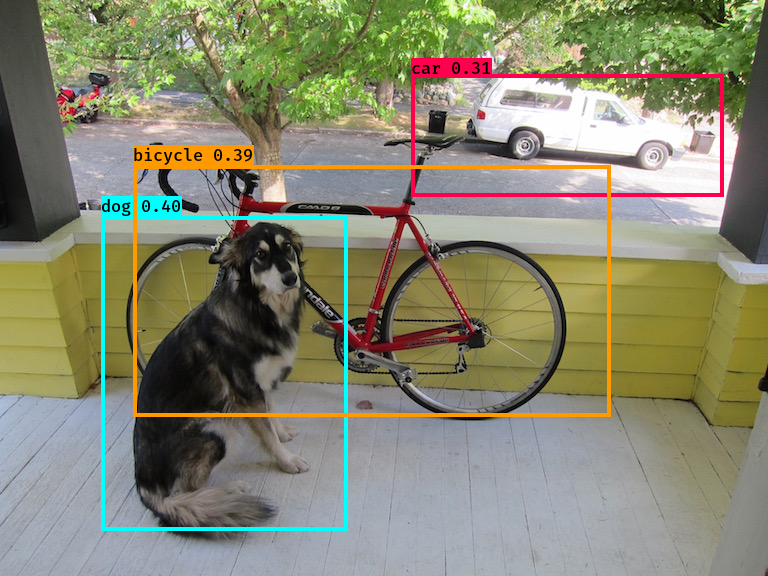

In [8]:
r_image

# 2.請敘述，訓練模型時，資料集的格式是什麼？

這個問題背後的動機是希望確保你理解在訓練模型的時候我們需要把資料轉換成這份 YOLO 訓練程式碼“讀得懂”的格式。其實很簡單，只要把範例中 convert_annotation 這個函數給看懂就可以了

In [10]:
with open("2007_train.txt", "r") as f:
  d = f.readlines()
print(d[:10])

['./VOCdevkit/VOC2007/JPEGImages/000012.jpg 156,97,351,270,6\n', './VOCdevkit/VOC2007/JPEGImages/000017.jpg 185,62,279,199,14 90,78,403,336,12\n', './VOCdevkit/VOC2007/JPEGImages/000023.jpg 9,230,245,500,1 230,220,334,500,1 2,1,117,369,14 3,2,243,462,14 225,1,334,486,14\n', './VOCdevkit/VOC2007/JPEGImages/000026.jpg 90,125,337,212,6\n', './VOCdevkit/VOC2007/JPEGImages/000032.jpg 104,78,375,183,0 133,88,197,123,0 195,180,213,229,14 26,189,44,238,14\n', './VOCdevkit/VOC2007/JPEGImages/000033.jpg 9,107,499,263,0 421,200,482,226,0 325,188,411,223,0\n', './VOCdevkit/VOC2007/JPEGImages/000034.jpg 116,167,360,400,18 141,153,333,229,18\n', './VOCdevkit/VOC2007/JPEGImages/000035.jpg 1,96,191,361,14 218,98,465,318,14\n', './VOCdevkit/VOC2007/JPEGImages/000036.jpg 27,79,319,344,11\n', './VOCdevkit/VOC2007/JPEGImages/000042.jpg 263,32,500,295,18 1,36,235,299,18\n']


這是檔案的每一行對應的是一張圖片的路徑以及該圖片中物件的坐標及類別信息。首先是圖片路徑，然後以空白鍵區隔每個物件的信息，物件訊息的順序是包圍框的左上角 x,y，右下角 x, y 以及類別 index。